# Evaluation Project-5

# Census Income Project

In [1]:
# importing all libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
# loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Here we got 32560 rows and 15 columns. Our target variable is income column. We see a mixture of numerical data columns and text data columns that will need to be converted to numerical format before training our model.
Also  our target varible has only two calsses <=50 and >50 so this becomes our classification problem.

# EDA

In [3]:
df.shape

(32560, 15)

32560 rows and 15 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


We can see all columns count is same which indictes there are no missing values in our data.

Object datatype columns are 9

integer datatype columns are 6


# Checking Null Values

In [5]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

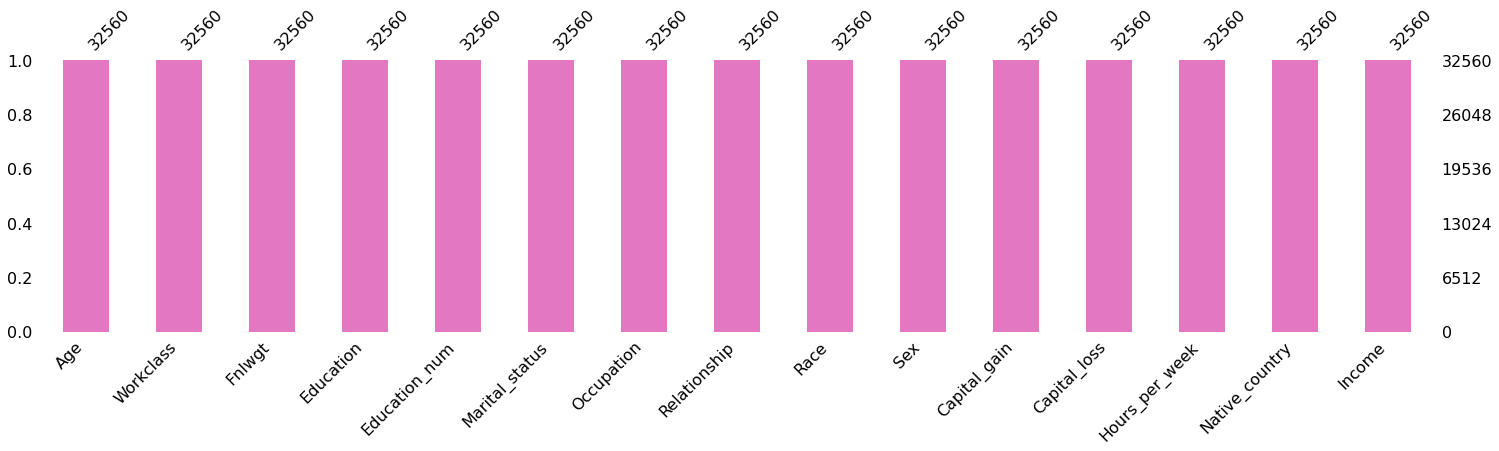

In [6]:
missingno.bar(df, figsize = (25,5), color="tab:pink")   # graphical representation of missing values

We have no missing values

In [7]:
# dividing columns in object and integer data
# getting list of object data type column names
object_d = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_d.append(x)
print(f"Object Data Type Columns are: ", object_d)


# getting the list of float data type column names
int_d = []
for x in df.dtypes.index:
    if df.dtypes[x]=='int64':
        int_d.append(x)
print(f"Integer Data Type Columns are: ", int_d)

Object Data Type Columns are:  ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
Integer Data Type Columns are:  ['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


All columns are of same length which can be seen from count columns<br>
mean > median columns are : Age, Fnlwgt, Capital_gain, Capital_loss, hours_per_week which shows data is right skewed<br>
Also Capital_gain and Capital_loss  have the value 0.0 for minimum value, 25% data slot, 50% data slot and 75% data slot, which is quite disturbing we will need to check that<br>
huge difference in 75% and max values is in Age, Fnlwgt, Capital_gain, Capital_loss, hours_per_week which shows presence of outliers<br>

# Checking Unique Values and value counts

In [9]:
df.nunique().to_frame("Unique values counts")

,Unique values counts
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


In [10]:
for i in df:
    print(i)
    print(df[i].value_counts())
    print('*'*120)

Age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
************************************************************************************************************************
Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
************************************************************************************************************************
Fnlwgt
164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64
************************************************************************************************************************
Education
 H

We see that there are some ? values in some columns. Lets replace them

In [11]:
df['Workclass'].replace({' ?': "Other Workclass"}, inplace= True)
df['Occupation'].replace({' ?':"Other"}, inplace =True)
df['Native_country'].replace({' ?': 'Other'}, inplace = True)

# Visualization

**Univariate Analysis**

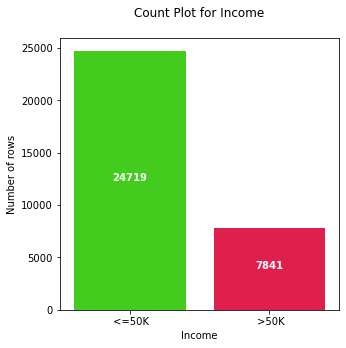

In [12]:
plt.figure(figsize=(5,5))
col_name = 'Income'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="prism")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()
    

Here we have 24719 pople having income less than or equal to 50K and 7841 people having income greater than 50K. This is our target variable and data is imbalanced

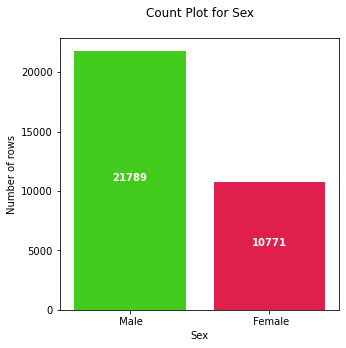

In [13]:
plt.figure(figsize=(5,5))
col_name = 'Sex'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="prism")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()
    

Male are more than female 

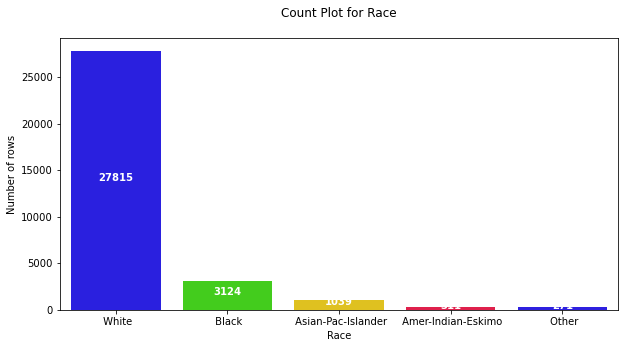

In [14]:
plt.figure(figsize=(10,5))
col_name = 'Race'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="prism")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()
    

White race people are more followed by black people.

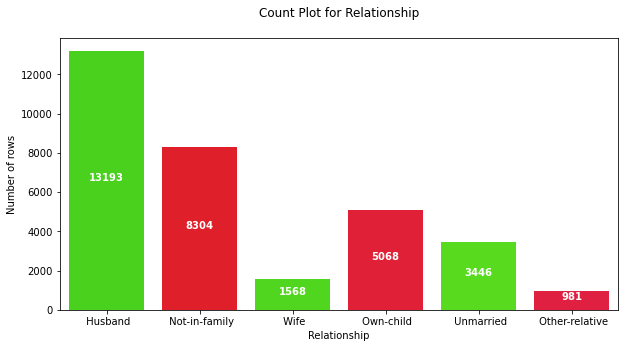

In [15]:
plt.figure(figsize=(10,5))
col_name = 'Relationship'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="prism")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()

In this we see that relationship "husband" has the highest count amongst all relatives, which is followed by Not-in-family, Own-Child

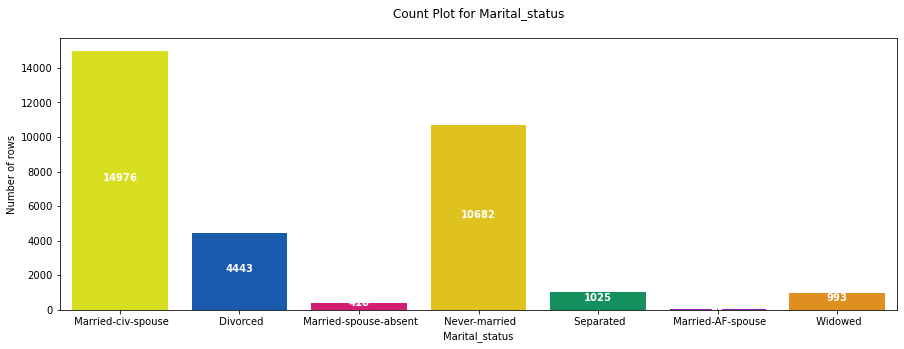

In [16]:
plt.figure(figsize=(15,5))
col_name = 'Marital_status'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="prism")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()

Most recorded marital status is Married-civ-spouse, followed by Never-married. Least found marrital status is Married-AF-spouse

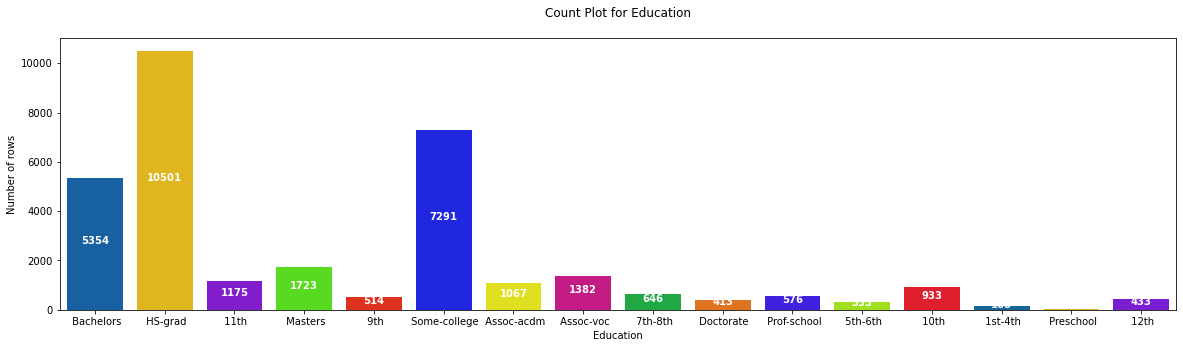

In [17]:
plt.figure(figsize=(20,5))
col_name = 'Education'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="prism")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()

Highest education found in most people are HS-graduate. Which clearly means, after graduating from high school most people start to work.<br>
Least found education is preschool

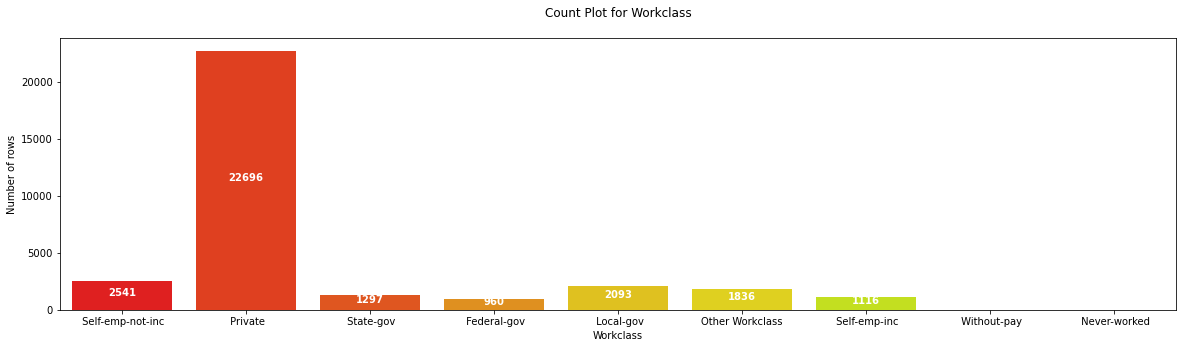

In [18]:
plt.figure(figsize=(20,5))
col_name = 'Workclass'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="prism")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()

People mostly work in Private sectors, followed by self-emp-not-inc.<br>
Very less people work in Fedral-gov.<br>
And in our recorded data, we have found no people are found that have never -worked or worked without-pay.<br>

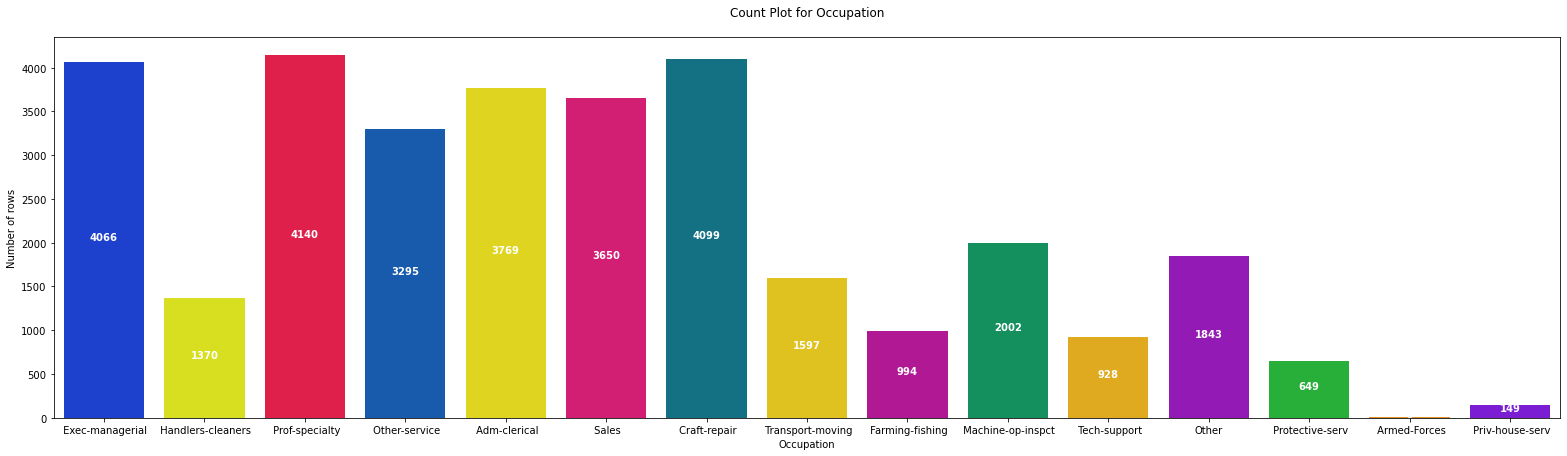

In [19]:
plt.figure(figsize=(27,7))
col_name = 'Occupation'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="prism")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()

Most recorded occupation is Craft-repair, followed by Exec-manegeria, Prof-speciality.<br>
Least recorded occupation is Armed-forces and Private house servant.

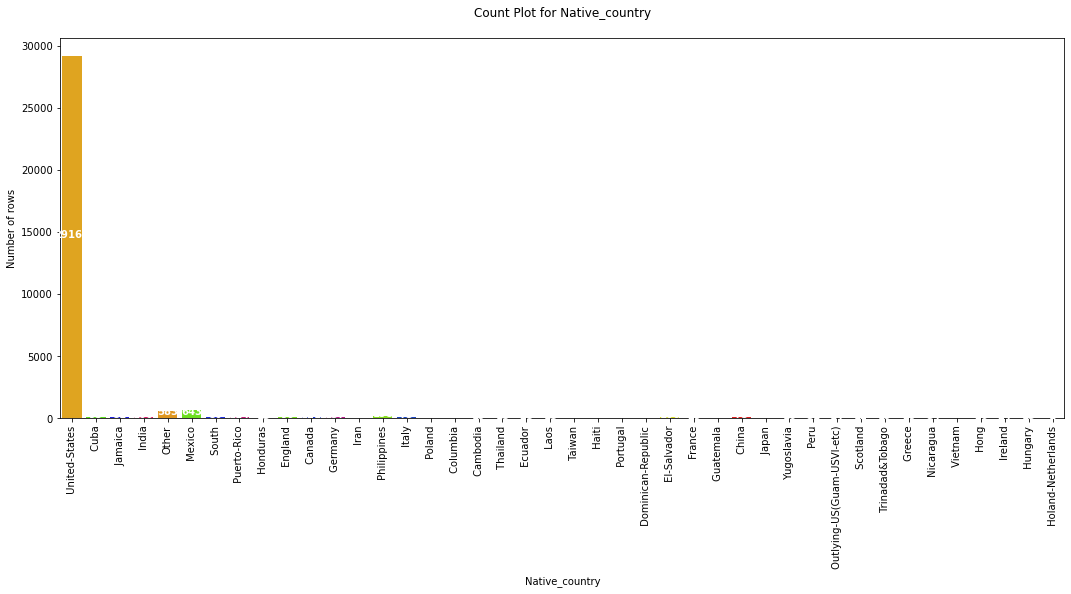

In [20]:
plt.figure(figsize=(18,7))
col_name = 'Native_country'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="prism")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

We can clearly see that the Native Country column has the highest value for US followed by Mexico and Others.<br>
Remaining categories has the least to neligible amount of data coverage.

(array([5570., 5890., 6048., 6162., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

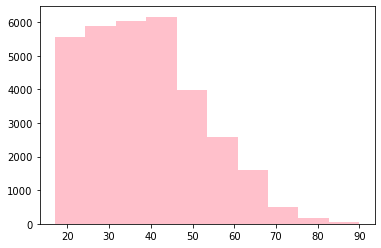

In [21]:
plt.hist(df['Age'],color= 'pink')

In our data from above graph we see that most recorded age is between 18-45

(array([1.3116e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <BarContainer object of 10 artists>)

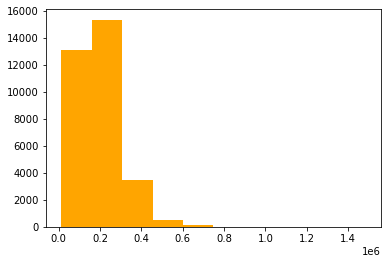

In [22]:
plt.hist(df['Fnlwgt'],color= 'orange')

Maximum Final Weight ranges from (0.1 - 0.3) le6

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7077.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

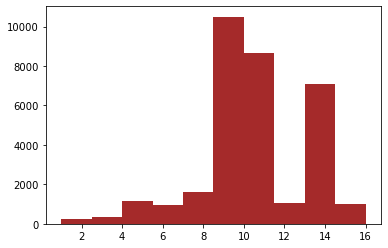

In [23]:
plt.hist(df['Education_num'],color= 'brown')

Maximum Education number ranges from 9 -11

(array([3.179e+04, 5.170e+02, 8.700e+01, 5.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.590e+02]),
 array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
        69999.3, 79999.2, 89999.1, 99999. ]),
 <BarContainer object of 10 artists>)

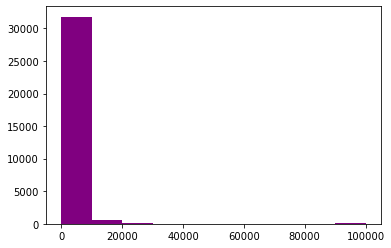

In [24]:
plt.hist(df['Capital_gain'],color= 'purple')

All capital gain ranges from 0- 20000

(array([3.1052e+04, 1.7000e+01, 2.1000e+01, 4.6100e+02, 7.7900e+02,
        2.0700e+02, 1.4000e+01, 0.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
        3484.8, 3920.4, 4356. ]),
 <BarContainer object of 10 artists>)

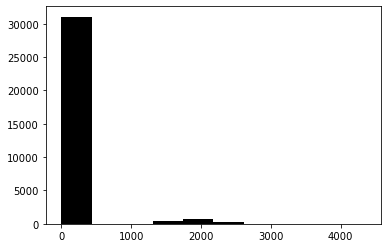

In [25]:
plt.hist(df['Capital_loss'],color= 'black')

Capital loss ranges from 0-500 , few observation also found between range 1500 - 2500

(array([  736.,  2192.,  2317., 17734.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

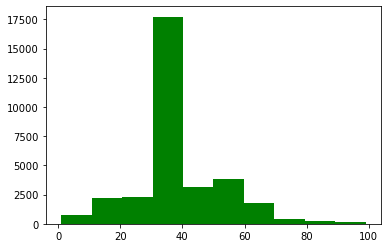

In [26]:
plt.hist(df['Hours_per_week'],color= 'green')

Maximum hours given per week are mostly ranging between 30-40

**Bivariate Analysis**

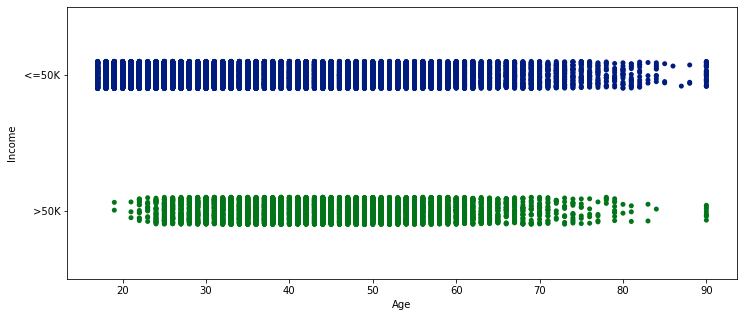

In [27]:
plt.style.use('seaborn-dark-palette')
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Age', y = 'Income', data=df)
plt.show()

We can see that people below the age 23-24 do not have income greater than 50K 

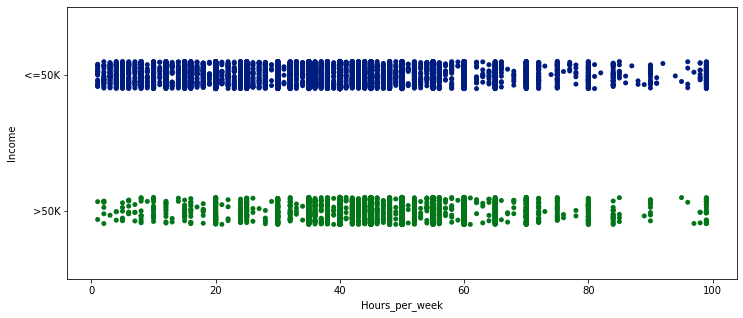

In [28]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Hours_per_week', y = 'Income', data=df)
plt.show()

People who have income greater than 50K usually work 35-60 hrs a week.<br>
Where as people who have income less than or equal to 50K put more hours of work as compared to people having income more than 50K


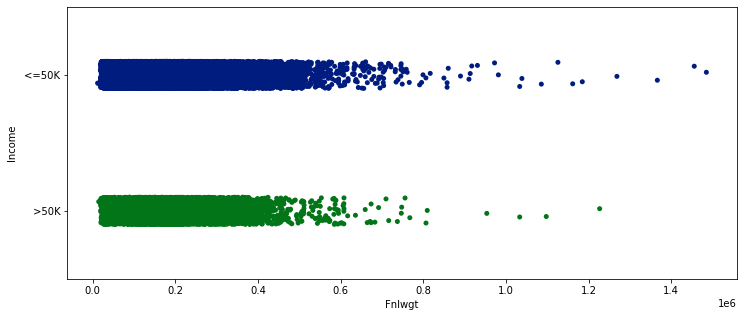

In [29]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Fnlwgt', y = 'Income', data=df)
plt.show()

In the above strip plot we can see that the final weight has data coverage on a higher scale for people in the <=50K income bracket as compared to the people in >50K income bracket.

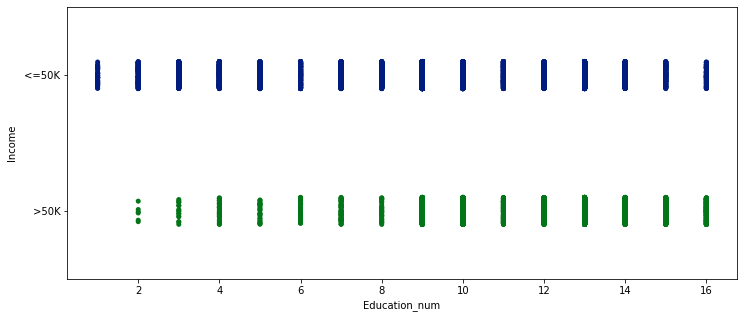

In [30]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Education_num', y = 'Income', data=df)
plt.show()

Here we can see that people earning >50K are very rare who are not educated. Everybody earning above 50K is well educated 

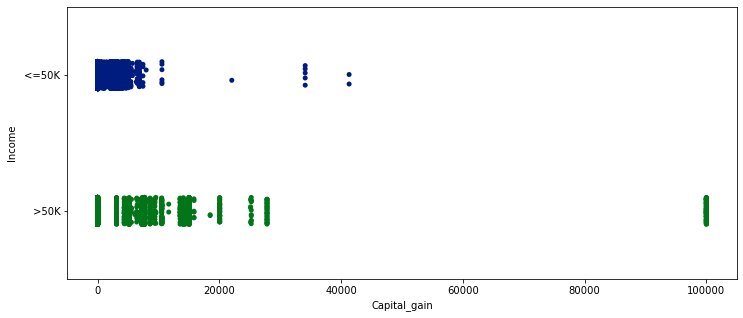

In [31]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Capital_gain', y = 'Income', data=df)
plt.show()

In the above strip plot we can see that the capital gain is on a higher scale for people with income >50K

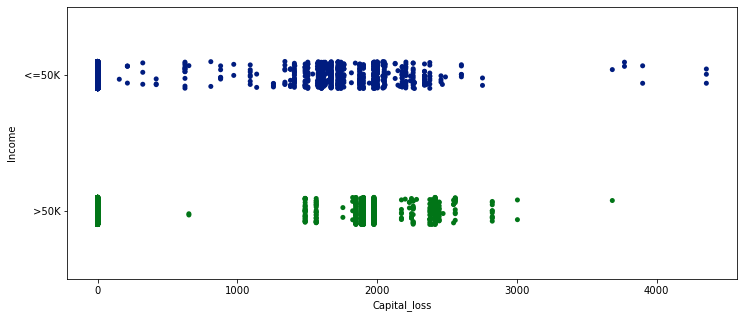

In [32]:
plt.figure(figsize=(12,5))
sns.stripplot(x = 'Capital_loss', y = 'Income', data=df)
plt.show()

In the above strip plot we can see that the capital loss is on a higher scale for people with income <=50K

<AxesSubplot:title={'center':'Education vs Income'}, xlabel='Education', ylabel='count'>

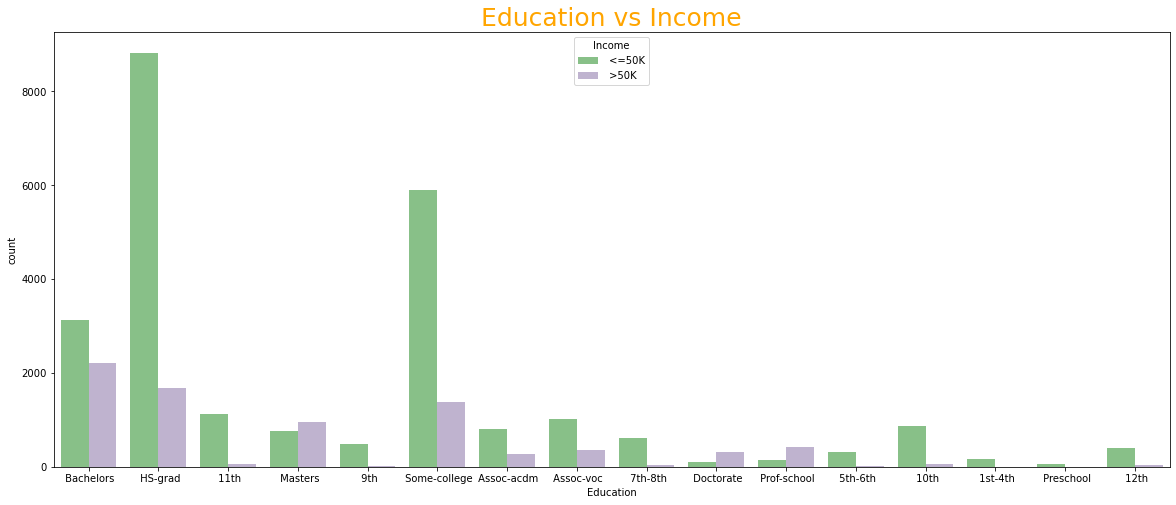

In [33]:
plt.figure(figsize=(20,8))

plt.title("Education vs Income",fontsize= 25,
        fontweight =180,
        color = 'orange',)

sns.countplot(data=df,x='Education',hue='Income', palette= 'Accent')

Here we see that people having income greater than 50K are mostly Bachelors, then followed by HS graduates.
Also we see that highest no of people having income less than 50K are HS graduates, this is because we have more records of people who are graduates amongst all other education category

Text(0, 0.5, 'Percentage of People')

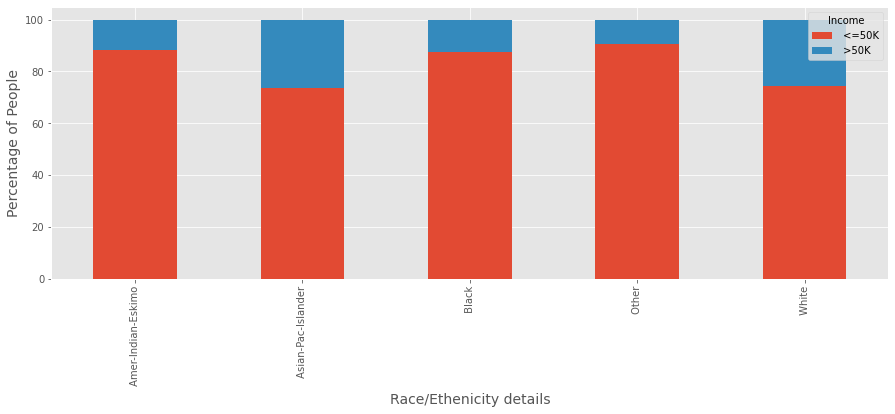

In [34]:
plt.style.use('ggplot')
ct = pd.crosstab(df['Race'], df['Income'])
(ct.div(ct.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Race/Ethenicity details', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Here we see how people of different race earn. Asian-Pac-Islander and white people amoung all other races, has more number of people earning greater than 50K

Text(0, 0.5, 'Percentage of People')

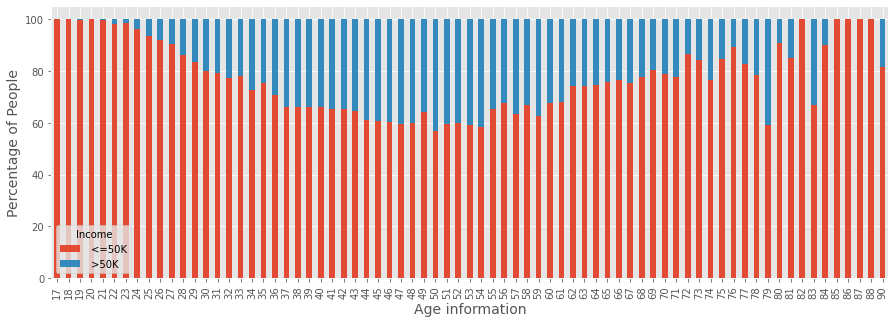

In [35]:
tbl = pd.crosstab(df['Age'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Age information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

People of age ranging between 38- 59 tend to earn more than 50K

Text(0, 0.5, 'Percentage of People')

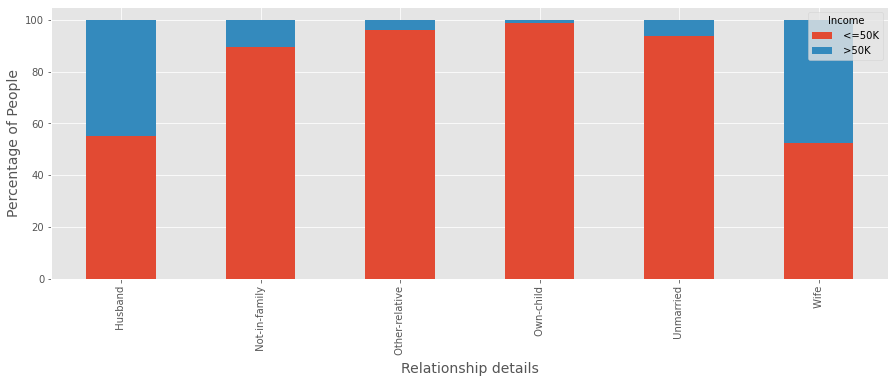

In [36]:
plt.style.use('ggplot')
ct = pd.crosstab(df['Relationship'], df['Income'])
(ct.div(ct.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Relationship details', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

After converting count of people to percentage it becomes easy for comparison.<br>
Either husband or wife relationship are earning more than 50K

Text(0, 0.5, 'Percentage of People')

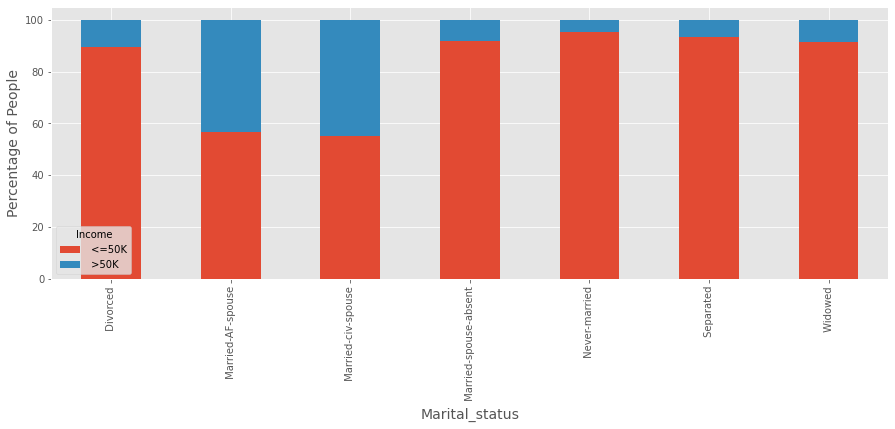

In [37]:
plt.style.use('ggplot')
ct = pd.crosstab(df['Marital_status'], df['Income'])
(ct.div(ct.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Marital_status', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

People having marrital status as Married-AF-spouse and Married-civ-spouse are earning greater than 50K as compared to other marital status

Text(0, 0.5, 'Percentage of People')

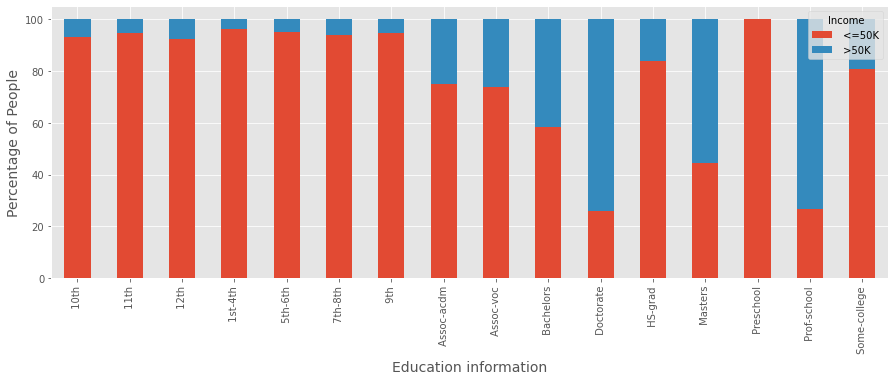

In [38]:
tbl = pd.crosstab(df['Education'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Education information', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Doctorates and Prof-School are earning >50K. while people whose education is between 1st- 4th earn <=50K

Text(0, 0.5, 'Percentage of People')

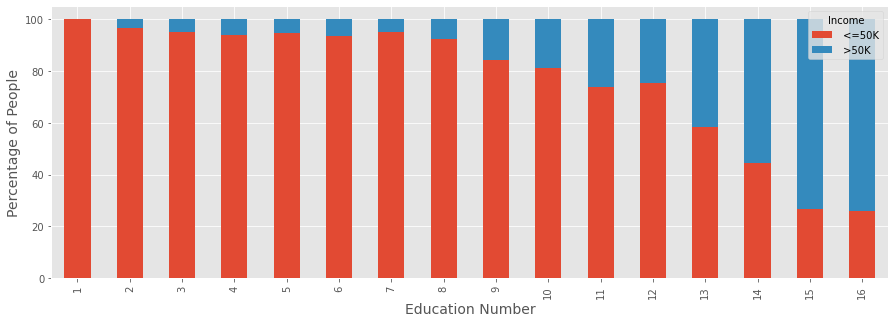

In [39]:
plt.style.use('ggplot')
ct = pd.crosstab(df['Education_num'], df['Income'])
(ct.div(ct.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Education Number', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Highest Education no 16 earns more than 50K. It is obvious that higher the education, higher the earnings

Text(0, 0.5, 'Percentage of People')

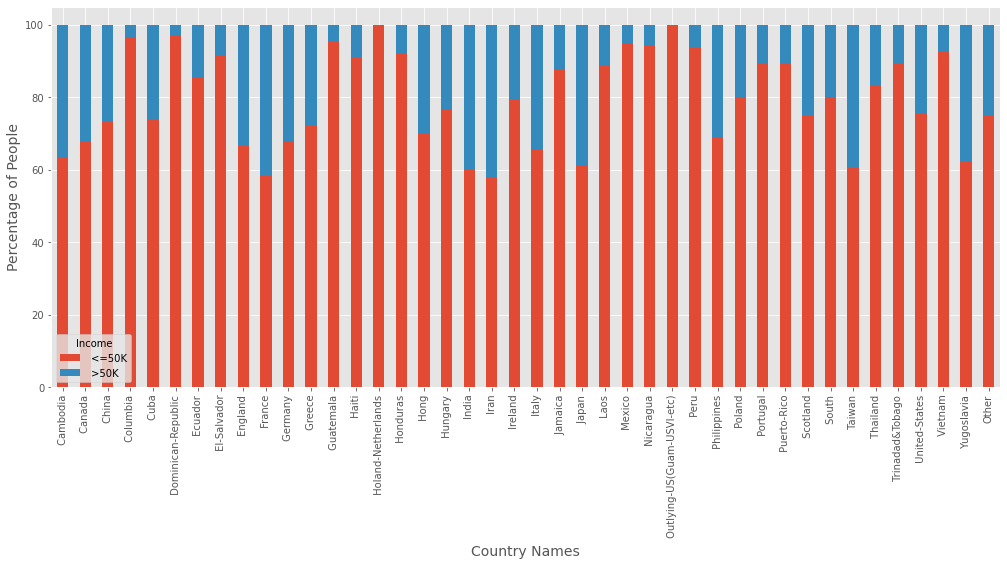

In [40]:
tbl = pd.crosstab(df['Native_country'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).sort_values(col_name).plot(kind='bar',stacked=True,figsize=(17,7))
plt.xlabel('Country Names', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Country where more no of people earn more than 50 K are France, Iran, Japan, India

Text(0, 0.5, 'Percentage of People')

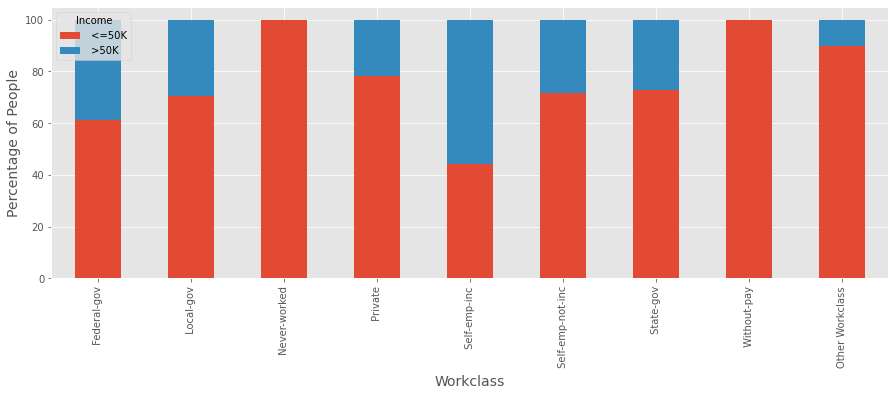

In [41]:
plt.style.use('ggplot')
ct = pd.crosstab(df['Workclass'], df['Income'])
(ct.div(ct.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Workclass', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Self-emp-inc are more who are earning more than 50K, followed by fedral gov 

Text(0, 0.5, 'Percentage of People')

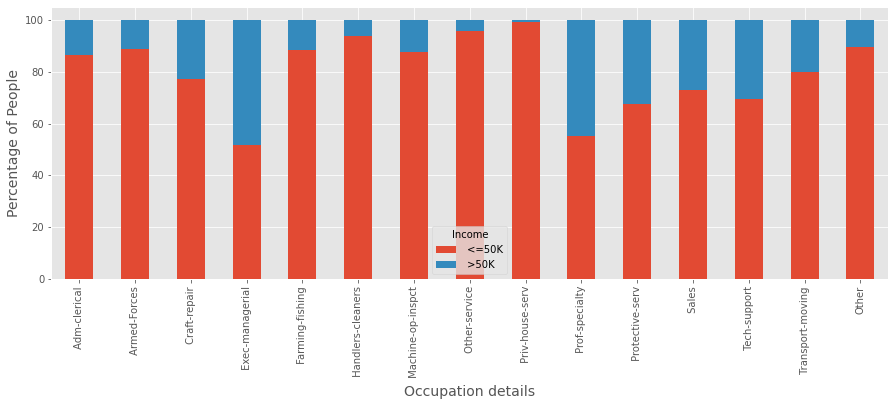

In [42]:
tbl = pd.crosstab(df['Occupation'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Occupation details', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

Occupation like Exec-manegerial, Prof-specialty earn more thsn 50K. 

Text(0, 0.5, 'Percentage of People')

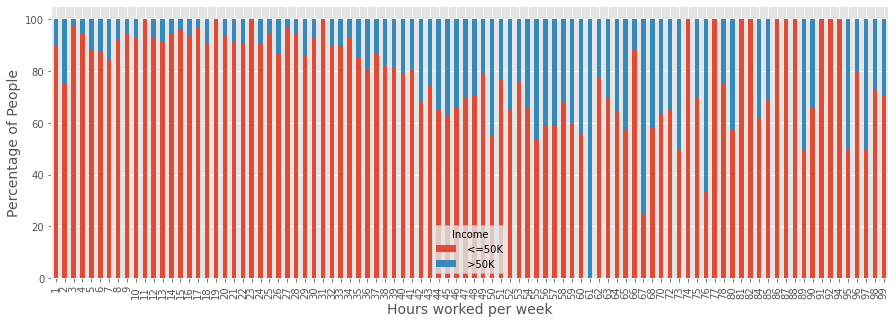

In [43]:
tbl = pd.crosstab(df['Hours_per_week'], df['Income'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(15,5))
plt.xlabel('Hours worked per week', fontsize=14)
plt.ylabel('Percentage of People', fontsize=14)

People giving 61 hrs per week are earning greater than 50K, followed by people giving 67 hrs

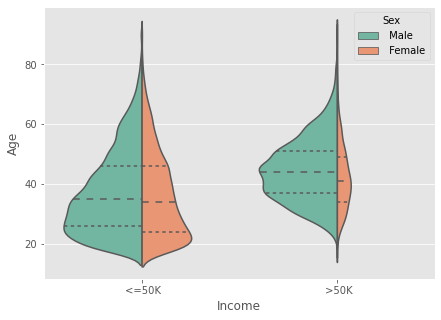

In [44]:
plt.figure(figsize=(7,5))
sns.violinplot(x="Income", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Above violin plot shows that male in any age group and income group have a higher number than female.

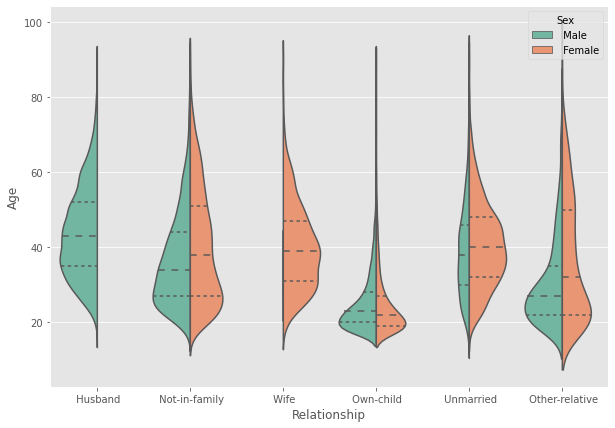

In [45]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Relationship", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()


Number of unmarried females are more than unmaried males.<br>
all relationships count is more btween age range 20-40.<br>
Own-child age range is quite different. It ranges from 10-30

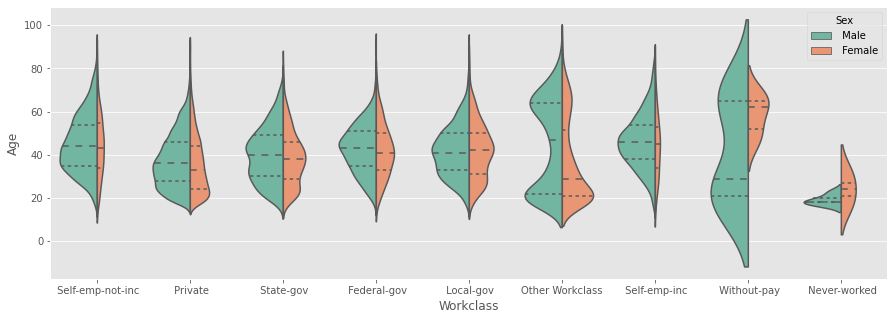

In [46]:
plt.figure(figsize=(15,5))
sns.violinplot(x="Workclass", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Here we can see in every workclass female are less than males.

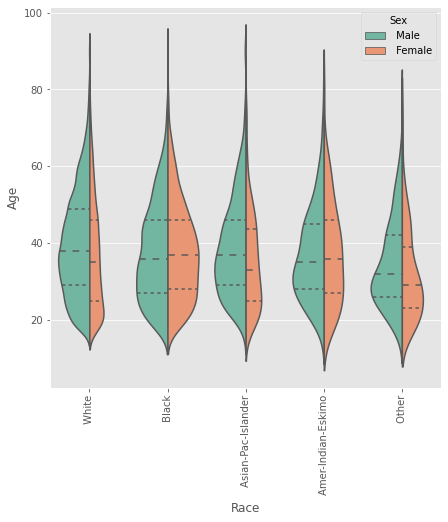

In [47]:
plt.figure(figsize=(7,7))
sns.violinplot(x="Race", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

female with black ethinicity of any age group is higher than the other ethinicity group females.

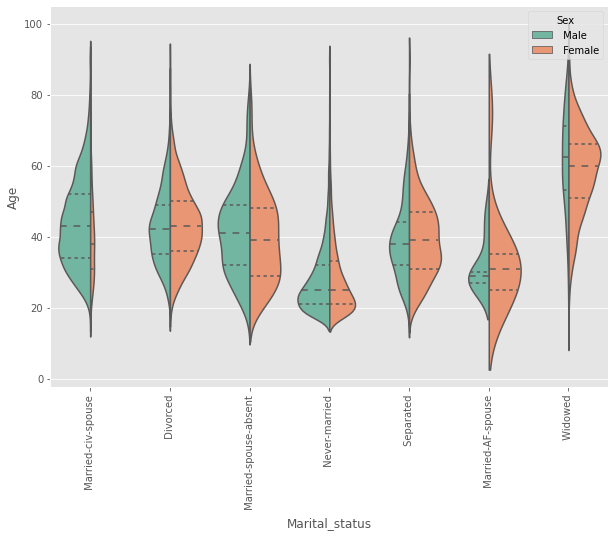

In [48]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Marital_status", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

Female widowed are more compared to males.<br>
More male are married to civ spouse and more female are married to AF- spouse.<br>
Age range between 20-30 are not married.
Age ranging above 30 are mostly married. divorced, widowed and other.


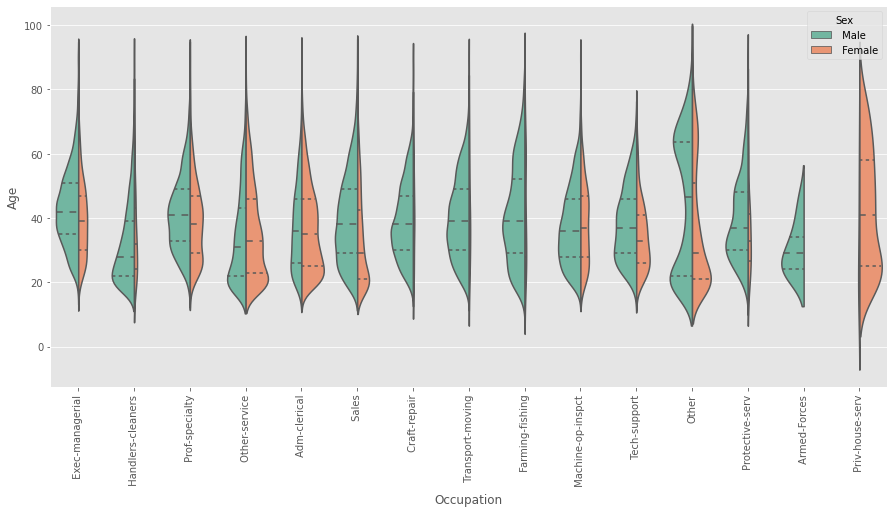

In [49]:
plt.figure(figsize=(15,7))
sns.violinplot(x="Occupation", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.xticks(rotation=90)
plt.show()

Every occupation again male numbers are more than female numbers except for Private house servent, this job is mostly done by females.<br>
Craft-repair, Transport-moving, Farming-fishing, armed-forces have no female workers

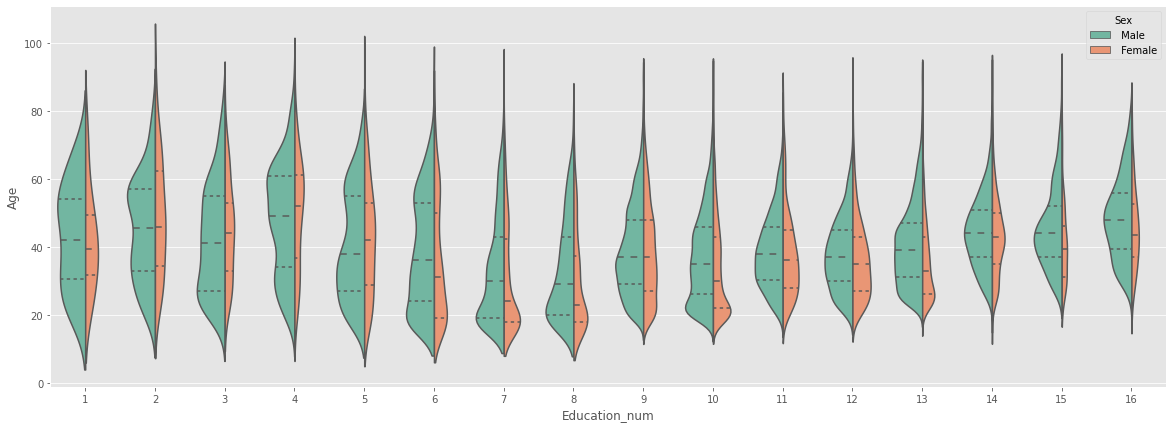

In [50]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education_num", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

In all age groups males are more educated than females

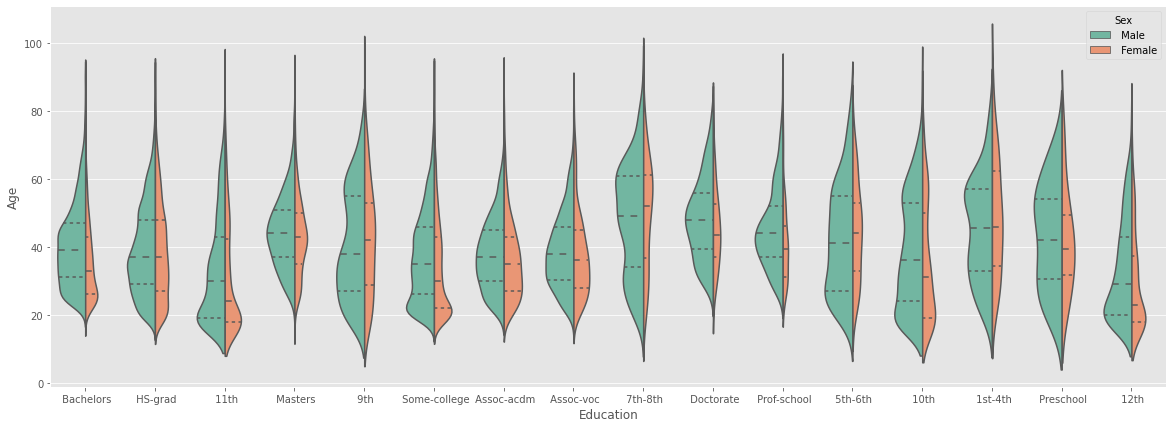

In [51]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Education", y="Age", hue="Sex", data=df, 
               palette="Set2", split=True, scale="count", inner="quartile")
plt.show()

Again male numbers are more every education feild

# Encoding of object columns

In [52]:
le= LabelEncoder()
oe = OrdinalEncoder()

#using label encoder for target variable
df["Income"] = le.fit_transform(df["Income"])


#using ordinal encoder for features
df["Workclass"] = oe.fit_transform(df["Workclass"].values.reshape(-1,1))
df["Education"] = oe.fit_transform(df["Education"].values.reshape(-1,1))
df["Marital_status"] = oe.fit_transform(df["Marital_status"].values.reshape(-1,1))
df["Occupation"] = oe.fit_transform(df["Occupation"].values.reshape(-1,1))
df["Relationship"] = oe.fit_transform(df["Relationship"].values.reshape(-1,1))
df["Race"] = oe.fit_transform(df["Race"].values.reshape(-1,1))
df["Sex"] = oe.fit_transform(df["Sex"].values.reshape(-1,1))
df["Native_country"] = oe.fit_transform(df["Native_country"].values.reshape(-1,1))
df["Income"] = oe.fit_transform(df["Income"].values.reshape(-1,1))

df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
3,28,3.0,338409,9.0,13,2.0,9.0,5.0,2.0,0.0,0,0,40,4.0,0.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0.0
5,49,3.0,160187,6.0,5,3.0,7.0,1.0,2.0,0.0,0,0,16,22.0,0.0
6,52,5.0,209642,11.0,9,2.0,3.0,0.0,4.0,1.0,0,0,45,38.0,1.0
7,31,3.0,45781,12.0,14,4.0,9.0,1.0,4.0,0.0,14084,0,50,38.0,1.0
8,42,3.0,159449,9.0,13,2.0,3.0,0.0,4.0,1.0,5178,0,40,38.0,1.0
9,37,3.0,280464,15.0,10,2.0,3.0,0.0,2.0,1.0,0,0,80,38.0,1.0


All Categorical values are converted to numerical values 

**Multivariate Analysis**

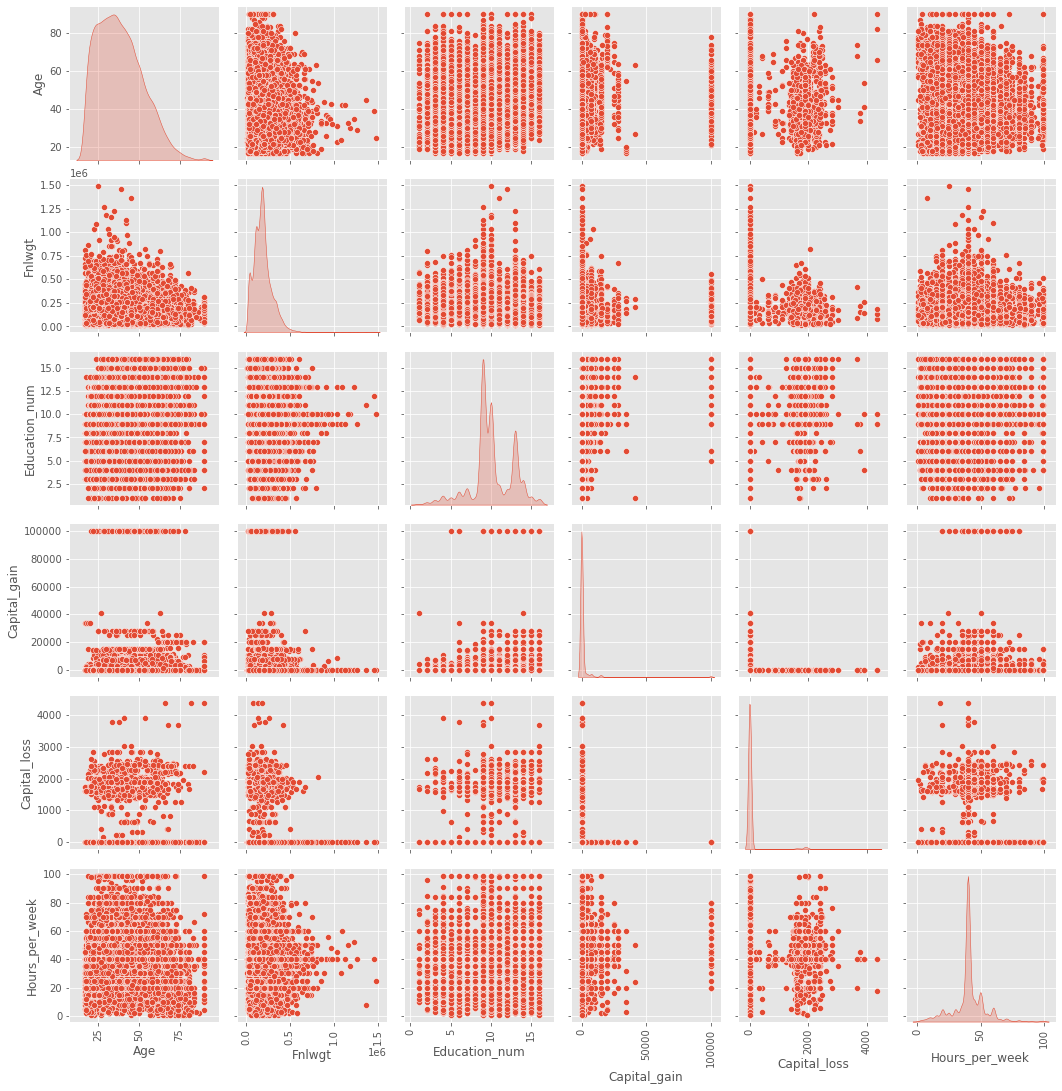

In [53]:
num = df.drop(['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
                      'Native_country', 'Income'], axis=1)

g = sns.pairplot(num, diag_kind="kde")
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

I have generated the above pairplot for continous data columns and showed how the data points are available in each of them.

# Correlation

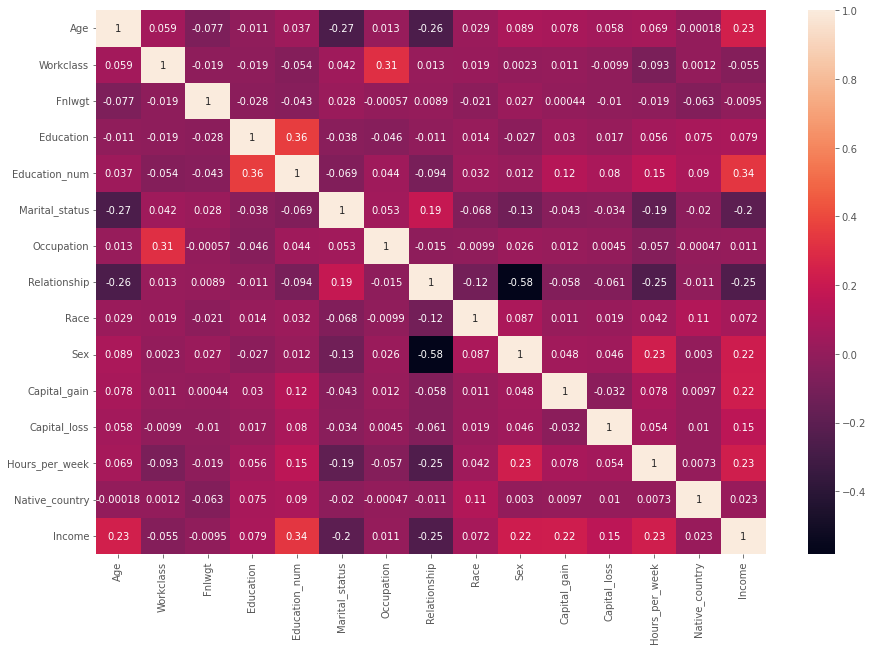

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Highly correlated columns: Education_num, Relationship, Age, Hours_per_week<br>
Least correlated columns : Occupation, Native_country, Capital_loss<br>
Positive correlated are: Education_num, hours_per_week, Age, Education, Occupation, Race, Sex, Capital_gain, Capital_loss, Native_country<br>
Negative Correlated columns are: Workclass, Fnlwgt, Marotal_status, Relationship

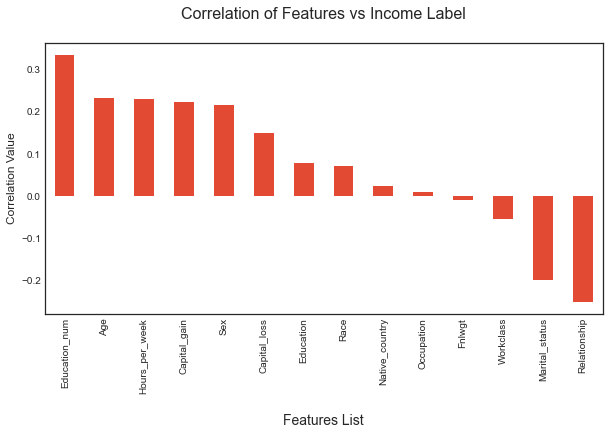

In [55]:
plt.style.use('seaborn-white')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['Income'].sort_values(ascending=False).drop('Income').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Here we get a clear representation of correlation which we have mention in heatmap.

# Checking and Removing Outliers

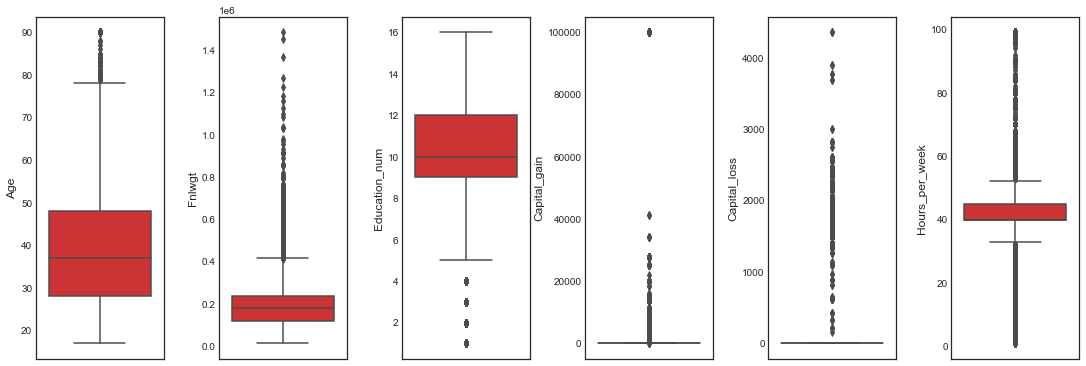

In [56]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[int_d].items():
    sns.boxplot(y=col, data=df, ax=ax[index], palette="Set1")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()


I am checking outliers of our numerical data only and as we can see above every column contains lots of outliers. 

**Removing Outliers**

In [57]:
z = np.array(abs(zscore(df)))
threshold = 3
print(np.where(z>3))


(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64), array([13, 12,  8, ...,  8,  8,  8], dtype=int64))


In [58]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5.0,83311,9.0,13,2.0,3.0,0.0,4.0,1.0,0,0,13,38.0,0.0
1,38,3.0,215646,11.0,9,0.0,5.0,1.0,4.0,1.0,0,0,40,38.0,0.0
2,53,3.0,234721,1.0,7,2.0,5.0,0.0,2.0,1.0,0,0,40,38.0,0.0
4,37,3.0,284582,12.0,14,2.0,3.0,5.0,4.0,0.0,0,0,40,38.0,0.0
5,49,3.0,160187,6.0,5,3.0,7.0,1.0,2.0,0.0,0,0,16,22.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3.0,257302,7.0,12,2.0,12.0,5.0,4.0,0.0,0,0,38,38.0,0.0
32556,40,3.0,154374,11.0,9,2.0,6.0,0.0,4.0,1.0,0,0,40,38.0,1.0
32557,58,3.0,151910,11.0,9,6.0,0.0,4.0,4.0,0.0,0,0,40,38.0,0.0
32558,22,3.0,201490,11.0,9,4.0,0.0,3.0,4.0,1.0,0,0,20,38.0,0.0


In [59]:
print("New shape",df_new.shape)
print("Old Shape",df.shape)
dataloss = ((32560-27783)/32560)*100
print("Percentage Data Loss is :",dataloss)

New shape (27783, 15)
Old Shape (32560, 15)
Percentage Data Loss is : 14.67137592137592


We have 14 % dataloss after removing outliers, but its ok because we have a lot of data remained for our model training so I am going to consider this and proceed

In [60]:
df = df_new.copy()   #copying new changes to old dataframe

# Checking Skewness:

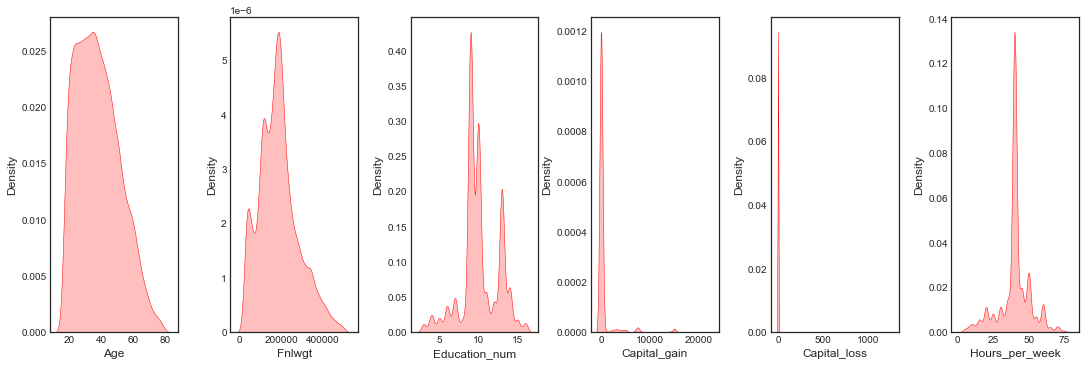

In [61]:
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[int_d].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

We see that Capital_gain, capital_loss, FnlWGt are slightly skewed

In [62]:
df.skew().sort_values()

Native_country    -5.179023
Race              -2.587270
Education         -0.955830
Sex               -0.688841
Hours_per_week    -0.359723
Education_num     -0.146241
Marital_status    -0.045497
Occupation         0.135730
Age                0.484815
Fnlwgt             0.627839
Relationship       0.752998
Workclass          1.183376
Income             1.323412
Capital_gain       4.930962
Capital_loss      29.521477
dtype: float64

# Splitting the Dataframe in Target and Feature Variables:

In [63]:
x = df.drop('Income', axis=1)
y=  df['Income']

# **Removing Skewness**

In [64]:
from sklearn.preprocessing import PowerTransformer
power_t = PowerTransformer(method = 'yeo-johnson')
x = pd.DataFrame(power_t.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.924782,1.061276,-1.126610,-0.489939,1.230081,-0.385370,-0.683150,-1.107778,0.348116,0.713243,-0.297139,-0.040278,-2.214946,0.041956
1,0.128424,-0.147670,0.413033,0.077604,-0.462835,-1.761318,-0.179076,0.105974,0.348116,0.713243,-0.297139,-0.040278,-0.039734,0.041956
2,1.099574,-0.147670,0.593388,-2.073703,-1.260785,-0.385370,-0.179076,-1.107778,-2.875906,0.713243,-0.297139,-0.040278,-0.039734,0.041956
3,0.053370,-0.147670,1.035892,0.382569,1.670509,-0.385370,-0.683150,1.549604,0.348116,-1.402047,-0.297139,-0.040278,-0.039734,0.041956
4,0.864651,-0.147670,-0.157099,-1.225853,-2.018188,0.269233,0.261986,0.105974,-2.875906,-1.402047,-0.297139,-0.040278,-2.011186,-3.654219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27778,-0.802746,-0.147670,0.798559,-0.996938,0.796110,-0.385370,1.206000,1.549604,0.348116,-1.402047,-0.297139,-0.040278,-0.222597,0.041956
27779,0.273932,-0.147670,-0.221694,0.077604,-0.462835,-0.385370,0.047645,-1.107778,0.348116,0.713243,-0.297139,-0.040278,-0.039734,0.041956
27780,1.374011,-0.147670,-0.249404,0.077604,-0.462835,2.162997,-1.709583,1.344133,0.348116,-1.402047,-0.297139,-0.040278,-0.039734,0.041956
27781,-1.329398,-0.147670,0.274496,0.077604,-0.462835,0.910377,-1.709583,1.075563,0.348116,0.713243,-0.297139,-0.040278,-1.721634,0.041956


In [65]:
x.skew().sort_values()

Race              -2.524683
Sex               -0.688841
Education         -0.313405
Occupation        -0.203045
Marital_status    -0.128269
Fnlwgt            -0.034501
Age               -0.018116
Education_num      0.026902
Hours_per_week     0.105225
Relationship       0.109542
Workclass          0.137669
Native_country     1.307405
Capital_gain       3.068452
Capital_loss      24.788464
dtype: float64

We have managed to reduce the skewness from our numerical columns and that can be seen above while we have ignored the skewness and outlier details for our categorical data.

# Multicollinearity

In [66]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif["VIF FACTOR"]= [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

calc_vif(x)

,variables,VIF FACTOR
0,Age,1.281441
1,Workclass,1.081616
2,Fnlwgt,1.022226
3,Education,1.086963
4,Education_num,1.159031
5,Marital_status,1.178386
6,Occupation,1.084825
7,Relationship,1.921095
8,Race,1.050165
9,Sex,1.641761


Every columns has VIF factor below 10 which is permissible.

# Balancing the data using SMOTE

<AxesSubplot:xlabel='Income', ylabel='count'>

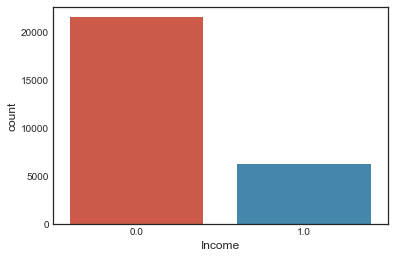

In [68]:
sns.countplot(y)

We can see our data is imbalanced. Lets balance it

In [69]:
sm = SMOTE()
x,y = sm.fit_resample(x, y)

<AxesSubplot:xlabel='Income', ylabel='count'>

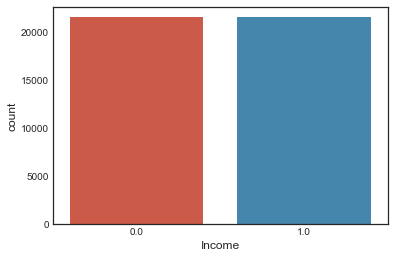

In [70]:
sns.countplot(y)

Hence our data is now balanced

In [71]:
x.shape

(43114, 14)

In [72]:
y.shape

(43114,)

# Scaling Features

In [73]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.816526,1.118808,-1.161555,-0.560785,0.985923,-0.297718,-0.719747,-0.869051,0.309167,0.611459,-0.389017,-0.034162,-2.459202,0.016724
1,-0.053850,-0.100005,0.432533,0.049645,-0.659344,-1.872346,-0.200507,0.328167,0.309167,0.611459,-0.389017,-0.034162,-0.198155,0.016724
2,1.007563,-0.100005,0.619265,-2.264228,-1.434834,-0.297718,-0.200507,-0.869051,-3.241777,0.611459,-0.389017,-0.034162,-0.198155,0.016724
3,-0.135879,-0.100005,1.077417,0.377655,1.413955,-0.297718,-0.719747,1.752132,0.309167,-1.637096,-0.389017,-0.034162,-0.198155,0.016724
4,0.750805,-0.100005,-0.157761,-1.352309,-2.170919,0.451406,0.253826,0.328167,-3.241777,-1.637096,-0.389017,-0.034162,-2.247401,-3.878839


# Finding the Best Random State

In [74]:
max_Accu=0
max_RS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>max_Accu:
        max_Accu=acc_score
        max_RS=i

print("Best accuracy score is", max_Accu,"on Random State", max_RS)

Best accuracy score is 79.04441609648613 on Random State 538


Hence our random state is 538 where the model gives highest accuracy

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=538)

# Feature Importance Bar Graph

,Importance
Features,
Age,0.17
Relationship,0.15
Fnlwgt,0.12
Marital_status,0.12
Education_num,0.09
Hours_per_week,0.09
Occupation,0.07
Capital_gain,0.07
Workclass,0.04


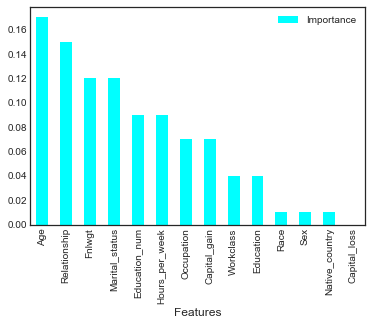

In [76]:
rf=RandomForestClassifier()
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,2)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='cyan')
importances

Above Bar graph gives the priority of features to predict Income. Highest priority is of Age followed by Relationship, followed by Fnlwgt

# Training the Model

LogisticRegression()
Accuracy Score of LogisticRegression() is: 79.04441609648613
Cross Validation Score are : [0.77094156 0.78080857 0.76960546 0.77398928 0.77739893 0.78454295
 0.78324403]
Cross Validation Score: 78.45429452833253
Accuracy Score - CV_Score 0.5901215681536058
[[3316  952]
 [ 855 3500]]
              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      4268
         1.0       0.79      0.80      0.79      4355

    accuracy                           0.79      8623
   macro avg       0.79      0.79      0.79      8623
weighted avg       0.79      0.79      0.79      8623

AUC Score of  LogisticRegression() is 0.7903093213910262


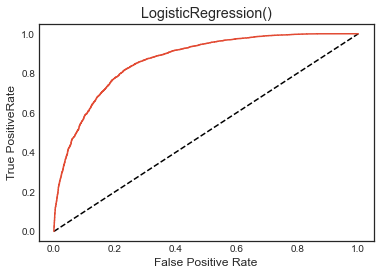



************************************************************************************************************************
GaussianNB()
Accuracy Score of GaussianNB() is: 77.5136263481387
Cross Validation Score are : [0.76655844 0.770742   0.76311089 0.76911836 0.76587108 0.77837311
 0.76879364]
Cross Validation Score: 77.83731125182659
Accuracy Score - CV_Score -0.3236849036878908
[[3080 1188]
 [ 751 3604]]
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76      4268
         1.0       0.75      0.83      0.79      4355

    accuracy                           0.78      8623
   macro avg       0.78      0.77      0.77      8623
weighted avg       0.78      0.78      0.77      8623

AUC Score of  GaussianNB() is 0.774602009776652


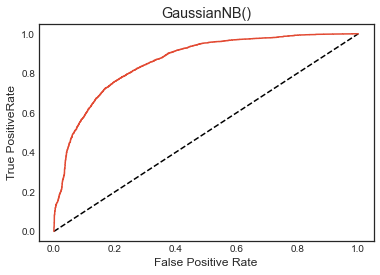



************************************************************************************************************************
DecisionTreeClassifier()
Accuracy Score of DecisionTreeClassifier() is: 85.78221036762147
Cross Validation Score are : [0.76964286 0.77902257 0.87920117 0.89089138 0.8917032  0.89316447
 0.89024192]
Cross Validation Score: 89.31644747523949
Accuracy Score - CV_Score -3.5342371076180115
[[3673  595]
 [ 631 3724]]
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      4268
         1.0       0.86      0.86      0.86      4355

    accuracy                           0.86      8623
   macro avg       0.86      0.86      0.86      8623
weighted avg       0.86      0.86      0.86      8623

AUC Score of  DecisionTreeClassifier() is 0.8578497552608955


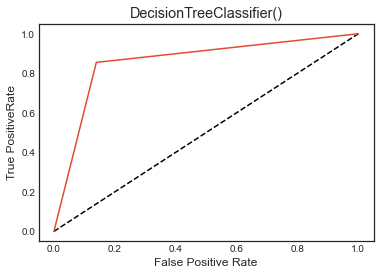



************************************************************************************************************************
KNeighborsClassifier()
Accuracy Score of KNeighborsClassifier() is: 85.61985387916039
Cross Validation Score are : [0.84431818 0.84445527 0.85776912 0.86458841 0.86767332 0.8709206
 0.8668615 ]
Cross Validation Score: 87.09206039941549
Accuracy Score - CV_Score -1.4722065202550993
[[3313  955]
 [ 285 4070]]
              precision    recall  f1-score   support

         0.0       0.92      0.78      0.84      4268
         1.0       0.81      0.93      0.87      4355

    accuracy                           0.86      8623
   macro avg       0.87      0.86      0.86      8623
weighted avg       0.86      0.86      0.86      8623

AUC Score of  KNeighborsClassifier() is 0.8553998893858873


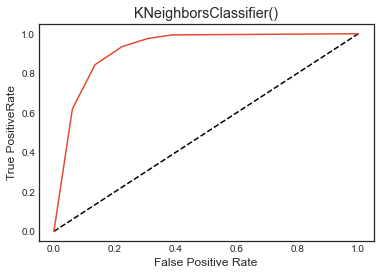



************************************************************************************************************************
RandomForestClassifier()
Accuracy Score of RandomForestClassifier() is: 90.15423866403803
Cross Validation Score are : [0.83165584 0.83422634 0.92157818 0.92579964 0.93424257 0.93375548
 0.93245657]
Cross Validation Score: 93.4242571846079
Accuracy Score - CV_Score -3.270018520569863
[[3789  479]
 [ 370 3985]]
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      4268
         1.0       0.89      0.92      0.90      4355

    accuracy                           0.90      8623
   macro avg       0.90      0.90      0.90      8623
weighted avg       0.90      0.90      0.90      8623

AUC Score of  RandomForestClassifier() is 0.901404815372349


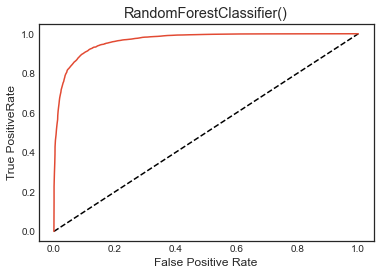



************************************************************************************************************************
SVC(probability=True)
Accuracy Score of SVC(probability=True) is: 83.3816537168039
Cross Validation Score are : [0.82224026 0.81880175 0.81863939 0.83373924 0.83812307 0.84007144
 0.83812307]
Cross Validation Score: 84.00714401688586
Accuracy Score - CV_Score -0.6254903000819638
[[3278  990]
 [ 443 3912]]
              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82      4268
         1.0       0.80      0.90      0.85      4355

    accuracy                           0.83      8623
   macro avg       0.84      0.83      0.83      8623
weighted avg       0.84      0.83      0.83      8623

AUC Score of  SVC(probability=True) is 0.8331595393374127


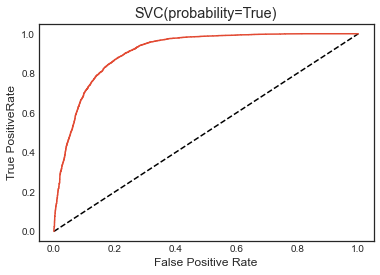



************************************************************************************************************************
ExtraTreesClassifier()
Accuracy Score of ExtraTreesClassifier() is: 91.20955583903513
Cross Validation Score are : [0.8612013  0.87270661 0.92239    0.92628673 0.93180711 0.93505439
 0.92985874]
Cross Validation Score: 93.50543919467445
Accuracy Score - CV_Score -2.295883355639319
[[3805  463]
 [ 295 4060]]
              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91      4268
         1.0       0.90      0.93      0.91      4355

    accuracy                           0.91      8623
   macro avg       0.91      0.91      0.91      8623
weighted avg       0.91      0.91      0.91      8623

AUC Score of  ExtraTreesClassifier() is 0.9118900218107789


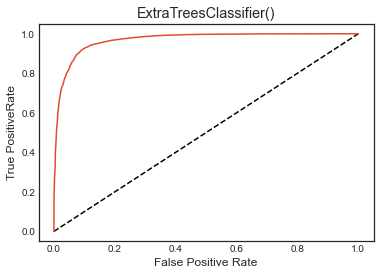



************************************************************************************************************************
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Accuracy Score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_s

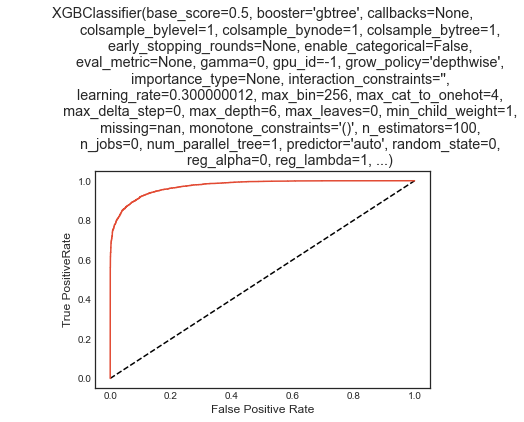



************************************************************************************************************************
LGBMClassifier()
Accuracy Score of LGBMClassifier() is: 90.24701380030152
Cross Validation Score are : [0.78295455 0.79655788 0.91784381 0.92596201 0.93554148 0.93440494
 0.93537912]
Cross Validation Score: 93.5541484007144
Accuracy Score - CV_Score -3.30713460041288
[[3842  426]
 [ 415 3940]]
              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      4268
         1.0       0.90      0.90      0.90      4355

    accuracy                           0.90      8623
   macro avg       0.90      0.90      0.90      8623
weighted avg       0.90      0.90      0.90      8623

AUC Score of  LGBMClassifier() is 0.9024473372449985


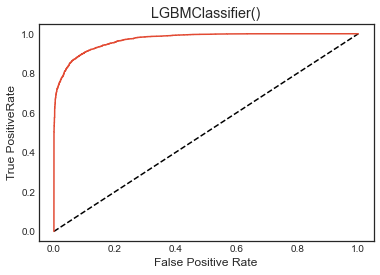



************************************************************************************************************************


In [77]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC(probability=True)
dtc =DecisionTreeClassifier()
knn= KNeighborsClassifier()
rfc= RandomForestClassifier()
etc = ExtraTreesClassifier()
xg= xgb.XGBClassifier(verbosity = 0)
LGBM = lgb.LGBMClassifier()

model=[lg,gnb,dtc,knn,rfc,svc,etc,xg,LGBM]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    
    #Calculating cross validation score
    for i in range(2,8):
        cvs=cross_val_score(m,x,y,cv=i)
    
    a = max(cvs)
    cv_score=(a.mean())*100      # taking max value of cvs and calculating mean of it    
# taking max value because I am assuming that accuracy score of all models to be approx 100 %
    
    
    y_pred_prob = m.predict_proba(x_test)[:,-1]
    fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, m.predict(x_test))
    print(m)
    print('Accuracy Score of',m,'is:',accuracy_score(y_test,predm)*100)
    print("Cross Validation Score are :", cvs)
    print("Cross Validation Score:", cv_score)
    print("Accuracy Score - CV_Score", (accuracy_score(y_test,predm)*100)-(cv_score))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("AUC Score of ",m,"is",auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True PositiveRate")
    plt.title(m)
    plt.show()
    print('\n')
    print('*'*120)

**Performance Table**

In [88]:
Performance_table = pd.DataFrame({"Model":['LR','GNB','DTC','KNC','RFC','SVC','ETC','XGB','LGBM'],
                                 "Accuracy_score":[79.04,77.51,85.78,85.61,90.15,83.38,91.20,90.91,90.24],
                                 "Cv Score":[78.45,77.83,89.31,87.09,93.42,84.00,93.50,94.64,93.55],
                                 "Result":[0.59,-0.32,-3.53,-1.47,-3.27,-0.62,-2.29,-3.72,-3.30],
                                 "AUC Score":[0.79,0.77,0.85,0.85,0.90,0.83,0.91,0.90,0.90]})

Performance_table

,Model,Accuracy_score,Cv Score,Result,AUC Score
0,LR,79.04,78.45,0.59,0.79
1,GNB,77.51,77.83,-0.32,0.77
2,DTC,85.78,89.31,-3.53,0.85
3,KNC,85.61,87.09,-1.47,0.85
4,RFC,90.15,93.42,-3.27,0.90
5,SVC,83.38,84.00,-0.62,0.83
6,ETC,91.20,93.50,-2.29,0.91
7,XGB,90.91,94.64,-3.72,0.90
8,LGBM,90.24,93.55,-3.30,0.90


From above performance table we can clearly see that SVC and ETC are giving best results. SVC because difference between CV score and accuracy score is less and ETC because its AUC score is best.
So I chose ETC for better AUC score

# Hypertuning

In [79]:
param = {'criterion' : ['gini', 'entropy'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 739, 1000],
              'max_depth' : [0, 15, 30],
              'n_estimators' : [100, 200, 300]
             }

In [80]:
GCV = GridSearchCV(ExtraTreesClassifier(), param, cv=5)

In [81]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 15, 30],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 739, 1000]})

In [82]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'n_estimators': 300,
 'n_jobs': -2,
 'random_state': 739}

In [89]:
final_model = ExtraTreesClassifier(criterion='gini', max_depth=30, n_estimators=300, n_jobs=-2, random_state=739)
Classifier = final_model.fit(x_train, y_train)
fmod_pred = final_model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 90.58332366925664


**AUC ROC Curve**

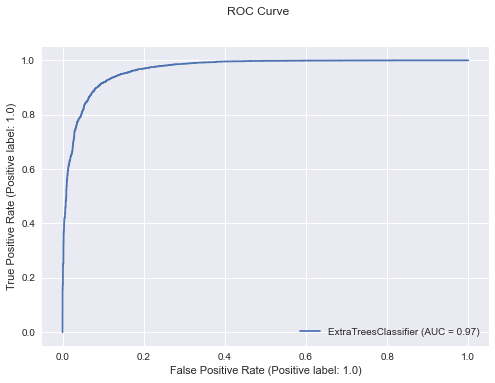

In [84]:
plt.style.use('seaborn')
disp = metrics.plot_roc_curve(final_model, x_test, y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

AUC score for my final model to be of 97%

**Confusion Matrix**

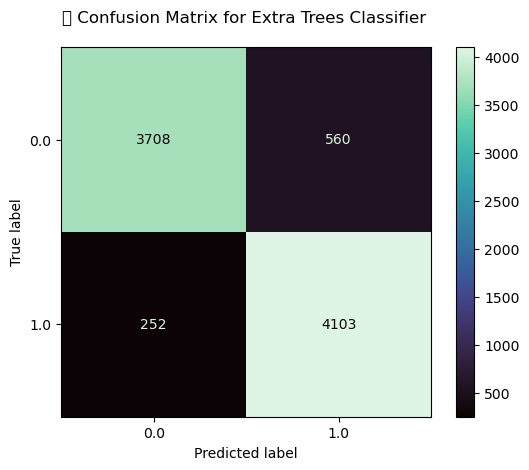

In [85]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my ML model missed to provide the correct prediction (depicting in the black boxes).

# Saving the Model

In [86]:
filename = "FinalModel_E05.pkl"
joblib.dump(final_model, filename)

['FinalModel_E05.pkl']

# Thanks for evaluating my project